In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
import os

In [3]:
os.chdir('im')

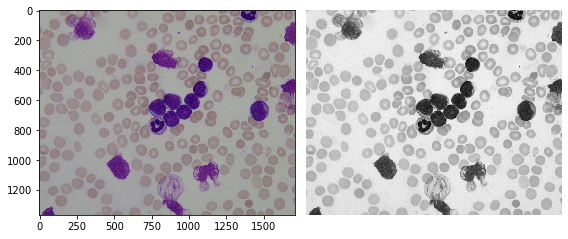

In [4]:
image = cv.imread('Im001_1.jpg')
image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.subplot(122)
plt.imshow(gray, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

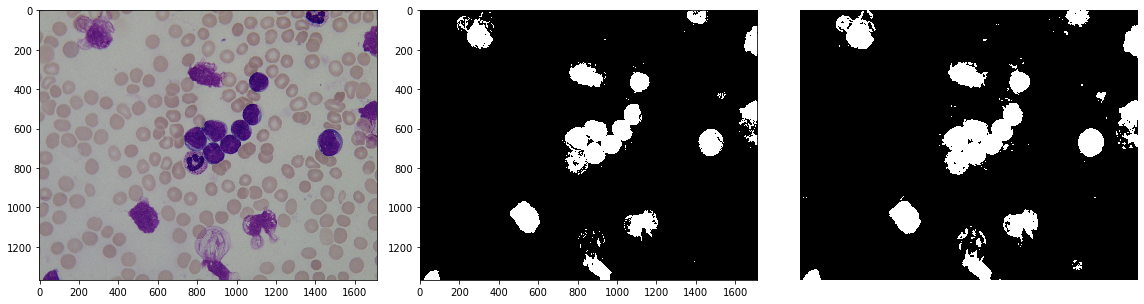

In [41]:
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
#             cv.THRESH_BINARY, 15, 15)

kernel = np.ones((13, 13), np.uint8)

# im_erode = cv.erode(thresh, cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11)), iterations=1)
im_dilate = cv.dilate(thresh, cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7)), iterations=1)
im_open = cv.morphologyEx(thresh, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7)))
im_close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))

im_result = im_dilate
plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(image, interpolation='nearest')
plt.subplot(132)
plt.imshow(thresh, cmap='gray', interpolation='nearest')
plt.subplot(133)
plt.imshow(im_result, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.tight_layout()
plt.show()

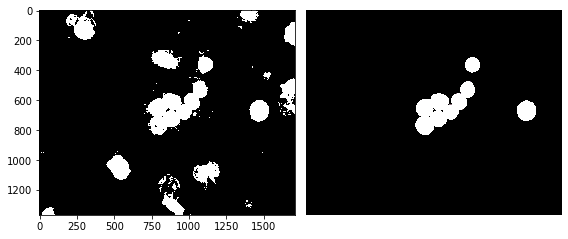

In [35]:
im_truth = cv.imread('Im001_1_gt.jpg')

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(im_result, cmap='gray', interpolation='nearest')
plt.subplot(122)
plt.imshow(im_truth, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()
